# ELG 20225: Applied Machine Learning
## Assignment 2 - Part 2:
Compare the performance of types of Naı̈ve Bayesian classifiers with the help of accuracy scores.

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


In [121]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)
print(df.shape)
df.head()

(4601, 58)


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [122]:
df.columns = [*df.columns[:-1], 'spam'] # change label of last column for convenience
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [123]:
df['spam'].value_counts()

0    2788
1    1813
Name: spam, dtype: int64

### Split the dataset into two parts as training data and test data. 

First 80 percent samples should be selected as training data and last 20 percent samples should
be selected as test data.

In [124]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['spam'],axis=1), df['spam'], test_size=0.2, shuffle=False)

### The following cell displays the gaussian naive bayes

In [125]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)

GausNB_y_pred = GausNB.predict(X_test)
GausNB_accuracy = accuracy_score(y_test, GausNB_y_pred)
GausNB_confusion_matrix = confusion_matrix(y_test, GausNB_y_pred)

print("Gaussian Naive Bayes Accuracy:", GausNB_accuracy)
print("Gaussian Naive Bayes Confusion Matrix:")
print(GausNB_confusion_matrix)
print()


GaussianNB()
Gaussian Naive Bayes Accuracy: 0.6178067318132465
Gaussian Naive Bayes Confusion Matrix:
[[569 352]
 [  0   0]]



In [126]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)

MultiNB_y_pred = MultiNB.predict(X_test)
MultiNB_accuracy = accuracy_score(y_test, MultiNB_y_pred)
MultiNB_confusion_matrix = confusion_matrix(y_test, MultiNB_y_pred)
print("Multinomial Naive Bayes Accuracy:", MultiNB_accuracy)
print("Multinomial Naive Bayes Confusion Matrix:")
print(MultiNB_confusion_matrix)


MultinomialNB()
Multinomial Naive Bayes Accuracy: 0.7231270358306189
Multinomial Naive Bayes Confusion Matrix:
[[666 255]
 [  0   0]]


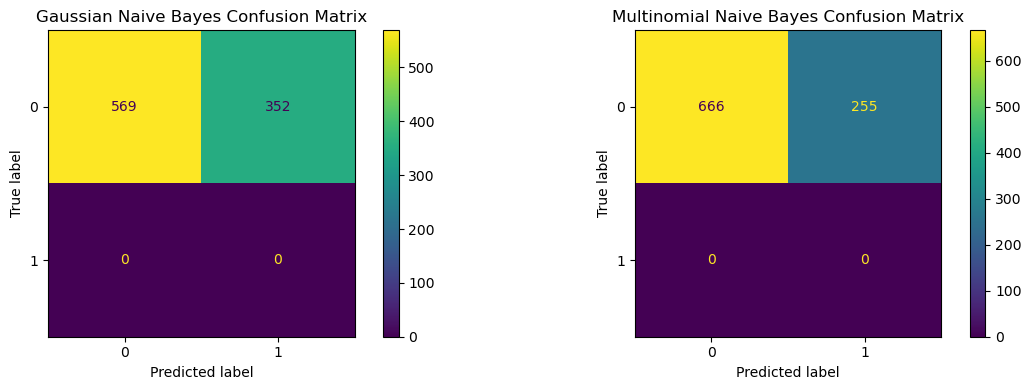

In [127]:
# Create ConfusionMatrixDisplay objects
gnb_cm_display = ConfusionMatrixDisplay(confusion_matrix=GausNB_confusion_matrix)
mnb_cm_display = ConfusionMatrixDisplay(confusion_matrix=MultiNB_confusion_matrix)

# Plot the confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].set_title('Gaussian Naive Bayes Confusion Matrix')
gnb_cm_display.plot(ax=axs[0])

axs[1].set_title('Multinomial Naive Bayes Confusion Matrix')
mnb_cm_display.plot(ax=axs[1])

plt.tight_layout()
plt.show()


Use train test split function on input and output of the whole data and utilize 80% of samples as train and 20% of samples as test data.

In [128]:
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(df.drop(['spam'],axis=1), df['spam'], test_size=0.2, random_state=42)

In [129]:
GausNB = GaussianNB()
GausNB.fit(X_train_shuffled, y_train_shuffled)

GausNB_y_pred = GausNB.predict(X_test_shuffled)
GausNB_accuracy = accuracy_score(y_test_shuffled, GausNB_y_pred)
GausNB_confusion_matrix = confusion_matrix(y_test_shuffled, GausNB_y_pred)

print("Gaussian Naive Bayes Accuracy:", GausNB_accuracy)
print("Gaussian Naive Bayes Confusion Matrix:")
print(GausNB_confusion_matrix)
print()


Gaussian Naive Bayes Accuracy: 0.8208469055374593
Gaussian Naive Bayes Confusion Matrix:
[[387 144]
 [ 21 369]]



In [130]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train_shuffled, y_train_shuffled)

MultiNB_y_pred = MultiNB.predict(X_test_shuffled)
MultiNB_accuracy = accuracy_score(y_test_shuffled, MultiNB_y_pred)
MultiNB_confusion_matrix = confusion_matrix(y_test_shuffled, MultiNB_y_pred)
# MultiNB_classification_report = classification_report(y_test, MultiNB_y_pred, zero_division=1)

print("Multinomial Naive Bayes Accuracy:", MultiNB_accuracy)
print("Multinomial Naive Bayes Confusion Matrix:")
print(MultiNB_confusion_matrix)
# print(MultiNB_classification_report)



Multinomial Naive Bayes Accuracy: 0.7861020629750272
Multinomial Naive Bayes Confusion Matrix:
[[445  86]
 [111 279]]


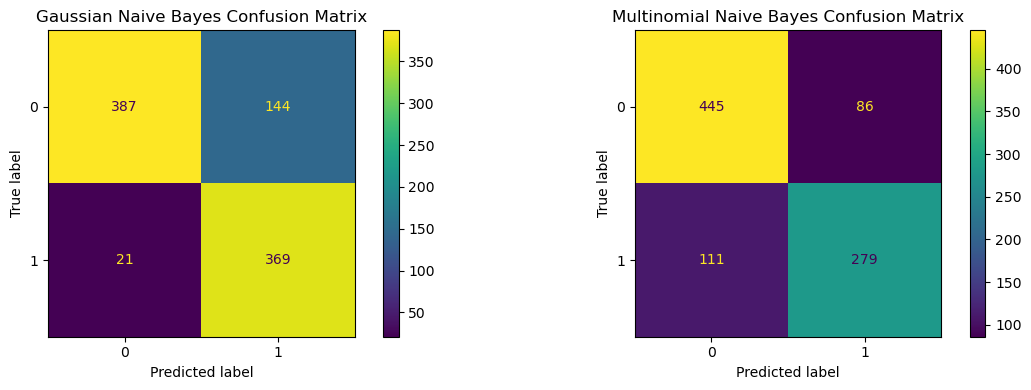

In [131]:
# Create ConfusionMatrixDisplay objects
gnb_cm_display = ConfusionMatrixDisplay(confusion_matrix=GausNB_confusion_matrix)
mnb_cm_display = ConfusionMatrixDisplay(confusion_matrix=MultiNB_confusion_matrix)

# Plot the confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].set_title('Gaussian Naive Bayes Confusion Matrix')
gnb_cm_display.plot(ax=axs[0])

axs[1].set_title('Multinomial Naive Bayes Confusion Matrix')
mnb_cm_display.plot(ax=axs[1])

plt.tight_layout()
plt.show()

Bernoulli Naive Bayes Accuracy: 0.8783930510314875
Bernoulli Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.58      0.73       921
           1       0.00      1.00      0.00         0

    accuracy                           0.58       921
   macro avg       0.50      0.79      0.37       921
weighted avg       1.00      0.58      0.73       921



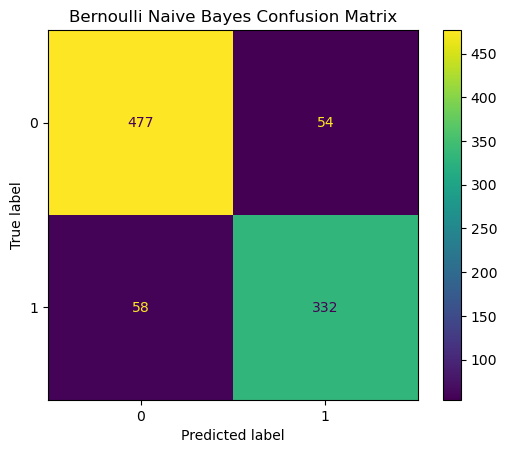

In [132]:
BernNB = BernoulliNB(binarize = True)
BernNB.fit(X_train_shuffled, y_train_shuffled)

BernNB_y_pred = BernNB.predict(X_test_shuffled)
BernNB_accuracy = accuracy_score(y_test_shuffled, BernNB_y_pred)
BernNB_confusion_matrix = confusion_matrix(y_test_shuffled, BernNB_y_pred)
bnb_classification_report = classification_report(y_test, BernNB_y_pred, zero_division=1)

print("Bernoulli Naive Bayes Accuracy:", BernNB_accuracy)
print("Bernoulli Naive Bayes Classification Report:")
print(bnb_classification_report)

# # Create ConfusionMatrixDisplay 
bnb_cm_display = ConfusionMatrixDisplay(confusion_matrix=BernNB_confusion_matrix)
bnb_cm_display.plot()

plt.title("Bernoulli Naive Bayes Confusion Matrix")
plt.show()

plt.show()

In [133]:
# Split the training data into four equal parts
subsets = np.array_split(X_train, 4)
subset_labels = np.array_split(y_train, 4)  


print("Training size:",X_train.shape[0])
# Print the size of each subset
for i, subset in enumerate(subsets):
    print(f"Subset {i+1} size: {subset.shape[0]}")

Training size: 3680
Subset 1 size: 920
Subset 2 size: 920
Subset 3 size: 920
Subset 4 size: 920


In [154]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

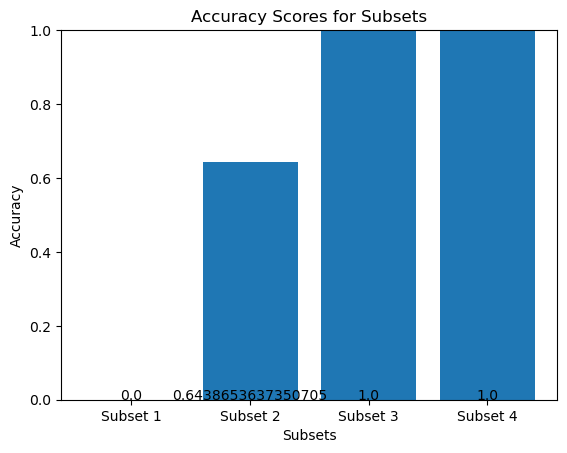

In [156]:
# Initialize a list to store the accuracy scores for each subset
subset_accuracies = []

# Train the Bernoulli Naive Bayes classifier on each subset and evaluate accuracy on test data
for subset, labels in zip(subsets, subset_labels):
    BernNB = BernoulliNB()
    BernNB.fit(subset, labels)
    subset_predictions = BernNB.predict(X_test)
    subset_accuracy = accuracy_score(y_test, subset_predictions)
    subset_accuracies.append(subset_accuracy)
    
# Plot the bar chart showing accuracy scores for each subset
subset_names = ['Subset 1', 'Subset 2', 'Subset 3', 'Subset 4']
plt.bar(subset_names, subset_accuracies)
addlabels(subset_names, subset_accuracies)
plt.title('Accuracy Scores for Subsets')
plt.xlabel('Subsets')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()